In [2]:
%matplotlib inline

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

import statsmodels.api as sm
norms = sm.robust.norms
from wotan import flatten

In [3]:
try:
    long_df = pd.read_csv('./example_data/dendrochronology/adams_et_al/detrended_data.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [176]:
try:
    df = pd.read_csv('./Training_Data/sclerochronology_training_1.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [177]:
long_df.head()
long_df.shape

(366, 58)

In [178]:
df_master = long_df.iloc[:, : 20]
df_master.shape
df_master.head()
#df_master.tail()
#print(1995-1630)

SLC01A  SLC01B  SLC02A  SLC02B  SLC03A  SLC03B  SLC04A  SLC04B  SLC05A  \
year                                                                           
1630     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1631     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1632     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1633     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1634     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

      SLC05B  SLC06A  SLC06B  SLC07A  SLC07B  SLC08A  SLC08B  SLC09A  SLC09B  \
year                                                                           
1630     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1631     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1632     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1633     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1634     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

      SLC11C  SLC13A  
year                  
1630     NaN     NaN  
1631     NaN     NaN  
1632     NaN     NaN  
1633     NaN     NaN  
1634     NaN     NaN

In [179]:
dendro = df_master.to_numpy()

print(dendro.shape)
print(dendro[0])
averaging = []
for i in range(dendro.shape[0]):
    name = str("average" + str(i))
    name = dendro[i]
    averaging.append(dendro[i])
    i += 1

def biweight_mean(list):
    x_star = np.mean(list[0])
    x = list
    u_vals = []
    w_vals = []
    
    c = 4.685
    for i in range(x):
        u_vals = (x[i]-x_star/np.median(np.absolute(x - np.median(x))))
        if np.absolute(u_vals<=c):
            w_vals = (1-(u_vals/c)**2)
        else:
            w_vals = (0)
    biweight = (np.sum(w_vals)*np.sum(x)/np.sum(w_vals))
    x_star = biweight
    return biweight

(366, 20)
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]


In [180]:
master_chronology = []
for i in range(len(averaging)):
    biweight = biweight_mean(averaging[i])
    master_chronology.append(biweight)
    

print(master_chronology)
print(len(master_chronology))

TypeError: only integer scalar arrays can be converted to a scalar index

In [181]:
df_master.head()

SLC01A  SLC01B  SLC02A  SLC02B  SLC03A  SLC03B  SLC04A  SLC04B  SLC05A  \
year                                                                           
1630     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1631     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1632     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1633     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1634     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

      SLC05B  SLC06A  SLC06B  SLC07A  SLC07B  SLC08A  SLC08B  SLC09A  SLC09B  \
year                                                                           
1630     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1631     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1632     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1633     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1634     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

      SLC11C  SLC13A  
year                  
1630     NaN     NaN  
1631     NaN     NaN  
1632     NaN     NaN  
1633     NaN     NaN  
1634     NaN     NaN

In [363]:
df.head()

master_chronology1  61253
year                           
649             1.936838    NaN
650             1.605328    NaN
651             1.079118    NaN
652             0.424857    NaN
653            -0.415379    NaN

In [182]:
samples = []
i= 0
for col in df.columns:
    col_list = df[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples.append(cleanedList)
print(samples)
print(len(samples))
print(len(samples[1]))  


[[1.936838481, 1.605328427, 1.079118093, 0.424857487, -0.415379142, -0.31108195, 0.369677032, 0.48068699, 0.010854986, 0.230856345, 1.772309398, 1.556165602, 1.823282499, 1.0222408, 1.292814337, 1.034969212, 0.901032981, 1.13027091, 1.715414673, 0.993393389, 1.850822571, 2.442041392, 0.857572185, 0.700019051, 1.138055918, 1.250789931, -0.097870558, 0.453070437, -0.333305342, 0.504733741, 1.899954477, 0.051051639, 1.78828375, 0.86615834, 0.809999495, -0.178119801, 0.901369303, 0.716136721, 1.536897697, 1.731422168, 2.000601153, 2.620271926, 0.537737633, 0.400781936, 2.190152718, 0.103830399, 0.355241377, 0.983944721, 0.376496977, 1.662446171, 0.952252259, -0.322735529, 0.089002856, 1.467448995, 2.252157677, 1.659527541, 0.490924974, 0.762300621, 1.794865524, 2.537889544, 0.842956782, 2.057922679, -0.344389753, -0.48525862, -0.341097262, 0.274200499, 0.322065686, 3.368399598, -0.049570852, 0.373415028, 3.251336099, 1.365383313, 1.829605354, 2.157757686, -0.139121435, 1.218136579, -0.5443

# Testing the Heatmap criteria

In [262]:
testing = [samples[1], samples[1]]

In [263]:
test_segments = {}

size = 10
step = 1
length = len(testing)
for j in range(length):
    test_segments[j] = ([testing[j][i : i + size] for i in range(0, len(testing[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

test_short = []

for i in range(len(test_segments)):
    for j in range(len(test_segments[i])):
        if len(test_segments[i][j]) != 10:
            #print(segments[i][j])
            test_short.append(test_segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
test_segments0 = [x for x in test_segments[0] if x not in test_short]
test_segments1 = [x for x in test_segments[1] if x not in test_short]
    
#print(segments0)

test_segments[0] = test_segments0
test_segments[1] = test_segments1
test_segments[0][-1]
assert len(test_segments[0][-1]) == 10
assert len(test_segments[1][-1]) == 10
print(len(test_segments[0]))


54


In [264]:
test_master_segments = test_segments[0]
test_sample_segments = test_segments[1]
test_pairs =  [(x,y) for x in test_master_segments for y in test_sample_segments]
#print(pairs)

print(len(test_pairs))
print(test_pairs[0])

2916
([0.308936361, 1.924613236, -0.10128158, 2.605036373, 1.699304928, 0.027098646, 1.589876781, -1.040348953, 1.647385572, 0.193615986], [0.308936361, 1.924613236, -0.10128158, 2.605036373, 1.699304928, 0.027098646, 1.589876781, -1.040348953, 1.647385572, 0.193615986])


In [265]:
import scipy.stats
test_t_vals = {}
for i in range(len(test_pairs)):
    (test_seg1, test_seg2) = test_pairs[i]
    if len(test_seg1) == len(test_seg2) == 10:
        r = np.corrcoef(test_seg1, test_seg2)[1,0]
        n = min(len(test_seg1), len(test_seg2))
        t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))
        print(t)
        test_t_vals[str(i) + " " + str(t)] = (test_seg1, test_seg2)
    else: 
        print(test_seg1,test_seg2)
#print(t_vals)
print(len(test_t_vals))
#t_vals.keys()

134217727.99999999
-2.1070484476438534
1.4095340224825572
-0.9212305081118082
-0.7155638216973129
0.4753092368743968
-1.0442875195317587
1.0070182639646599
-3.1554729903222865
1.217701179396878
-0.902979503366478
2.5319467906281554
0.6008207836735129
-0.1324626784839791
0.5439595851670306
-1.2537603441548006
3.4723929356780867
-2.0008164816234135
1.6051848969868512
-1.113144397812973
-0.14914712330752242
0.18171496879865248
-1.2259692885207985
-0.6732041602674551
-0.3061623973700073
-0.09569509977607245
1.2946942873556249
0.4608107345550386
0.299048077940178
0.9940919648564213
-0.6416739431380867
-0.31853359386969193
0.16784517604441918
0.3891793862474689
0.6990240054031963
-0.7537677992426257
-0.2042297225427625
-1.0795077375542752
-0.7510552215346123
-0.2767106966256732
-0.15723652348936085
2.2122903729420305
0.3852935291452723
0.2770931381871599
-0.024087122649035172
-1.189379469845114
0.03673097196873207
0.060570070534898754
0.8380241208870837
1.0327091381927314
0.16333336234705229

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_15331/678308890.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))


-0.48183266337752284
-1.88092990315557
-1.3798104067349755
-0.5294430142305457
1.3190775924168814
1.1031712605105395
0.9539784035085936
0.7346359090855293
0.23076873813077775
-0.3693038943853698
-0.5488603351996285
-0.8270837035046466
1.7302499966463443
0.24940605639167285
-1.6355647025296651
-1.168303545814883
-1.2260590242028508
-1.078278204609483
-0.8159508549574411
0.7934895889740362
3.156828501176114
1.293618761908455
0.38328152750565986
-1.5629720735457286
-1.03518685584494
-0.531825358277459
0.3303481162759589
1.869042025451301
0.5643701006835988
-0.0450079972694131
-1.070844734065288
-0.36978319607567683
0.182729381294464
-0.3180472200721477
-1.553271949748014
-0.902979503366478
1.034548321616947
-3.0418905829113636
0.41969753149771716
0.16547233393950486
0.011577527215266644
0.22021675185401493
-2.381816012629823
0.2712387069012187
-0.13384583258726104
inf
0.2763152753896158
-0.24345840513478204
-0.9698993526240162
-0.10370766243127258
2.0699925128778194
-0.587884450831301
0.8

0.7346359090855293
0.5977866717746043
1.8892793083739357
0.9452300290666107
0.24053697168528707
-0.881828655621581
-0.9220143216262745
0.6199728958293191
0.7359515079144933
0.5728895126012873
-1.7553414325301622
-0.7824503610700311
-1.396986691284328
-0.6296794573620637
-0.24039685777568165
-0.4538040830741071
1.054339050331516
inf
0.9080865751130258
-0.7189402592482056
-0.17423026358302787
0.11213915079512549
-0.9931096777225376
-0.6562670903096982
1.0423574330125498
1.1786795160218377
-1.6629003808709846
-3.131558159088157
-1.4953046680822928
0.30442466317176853
0.6674775088381416
1.435333277859681
2.3793996526003283
1.2171252892020072
-0.6544727082857754
-3.0899676041435273
-0.6552573844666916
1.1683617437576361
0.3893283548209303
1.1377736969733496
1.7962766136959152
-0.576129586354564
-2.2859265628975742
-0.5471869660840979
-0.8300201457090461
0.4608107345550386
1.1250228113927874
-0.44654661349510477
-0.32126970356628504
-1.0894109999845185
-0.16131094092659715
-0.851119744778371

-0.7791766119949374
-0.7966134975173569
0.9102226718200954
3.324543780831538
1.4680019330644298
-0.5736071594114238
-2.0814077824599524
-1.6531852469062396
-0.41766088541896573
0.5518036747889125
2.2920976112191815
1.4128391206194648
-1.9320125619183897
-1.6713575160303447
0.38244940756154605
-0.7537677992426257
1.0528097616063044
0.3097039707908506
0.11872910481021191
-0.18128158895497737
0.7996255174734243
0.7113963051867352
0.530903134288071
-0.36851843730119616
-1.2260590242028508
-1.0421887304092396
-0.47506012878717885
-0.32811456289079105
0.3510065355931918
-0.5861594054735145
0.008488089310115405
-1.9835816796300423
0.06951543464858365
-0.05657052614457603
0.6440093116770954
1.9060224874466076
1.9519899813701789
0.09602226044390007
0.9392066602214508
-0.7660220178430944
-1.6273095611028916
-1.6629003808709846
0.47498339260990613
0.5738955724024755
-0.6479385925198038
-0.8251270410759488
0.4060416805477398
-1.3375826364837833
-0.8507106569737435
0.875087315070234
inf
2.061319442

-1.5339137487318895
-0.25075783613119995
1.1070802441590488
0.9142209209277942
0.35109086252222976
-0.6016947126267619
-2.367265065657538
-1.4749196791232573
-1.2325836397137513
1.2689893475756349
inf
0.9678008794635243
-1.4429890670843961
-0.732408248776519
-1.143213305511758
-0.28577193846184656
1.620432914143166
0.8999423035340661
-0.5466062035556088
0.03673097196873207
-1.2100184863151888
-0.6949176176877594
0.5609180019113054
0.6235114163896264
-0.13284796205817734
-0.6399699123559294
-0.9265897974518715
0.8901846992507818
1.869042025451301
1.1170551101169426
-0.7325513373393047
-1.4338146450161298
-0.20212236864037733
0.7220635986636106
0.6219554999693386
-0.2507573499181416
-0.10889161527514515
0.4188248930866457
-0.038394609948080576
-0.6912513296487865
-1.8624977107565728
-0.7854269476425083
1.6251441183995141
1.0967591244739245
0.15284435509698027
1.168361743757636
-0.4383558884961036
-1.714513263642863
-0.11117804969691501
0.6162156059992745
0.7656854576062018
1.018386968985

-0.830020145709046
-0.2978996014964099
-1.8230960093470912
-0.707226041180381
-0.002670533255210787
-2.121207692795563
-0.11107382050713617
1.2659093998232336
0.38244940756154605
0.42487190572634026
1.2067713722119229
1.7988440515973936
0.5415634645883473
0.04908466199965388
-0.38166988653190764
-0.07332690945878283
-0.07857909311956507
-0.9299811616032635
0.19460341196467823
-0.546606203555609
-0.5136277070121179
1.0792446795369015
-0.7282157011745967
-0.4493827415260249
-0.2106716631111002
-1.5552720848486765
0.3202742895683798
inf
2916


In [266]:
test_values = list(test_t_vals.keys())
for i in range(len(test_values)):
    test_values[i] = float(test_values[i].split()[-1])
    
print(test_values)

print(len(test_values)/59)
n = 10
endlist = [[] for _ in range(n)]
for index, item in enumerate(test_values):
    endlist[index % n].append(item)
#print(endlist)

test_strides = [0]
length = int(len(test_values)//59)
for i in range(length):
    test_strides.append(59+i)
    i+=1

chronology = []
t_values_samples = []

for i in range(59):
    for j in range(len(test_strides)):
        chronology.append(test_values[test_strides[j]])
        j+=1
    test_strides = [x+1 for x in test_strides]
    t_values_samples.append(chronology)
    chronology = []
    i+=1
result = []
for i in range(len(t_values_samples)):
    result.append(sum(abs(float(number)) for number in t_values_samples[i]))
max_list = (max(result, key=abs))

print(result.index(max_list))

max_val = (max(t_values_samples[25], key=abs))
print(max_list)
print(max_val)
#print(t_values_samples)
#print(len(t_values_samples))
std = np.std(test_values)
mean = np.mean(test_values)
#print(mean)
out_up = mean+3*std
#print(out_up)
out_down = mean-3*std
#print(out_down)
outlying = []
for x in range(len(test_values)):
    if test_values[x] >= out_up or test_values[x] <= out_down: 
        outlying.append(test_values[x])
#print(outlying)


[134217727.99999999, -2.1070484476438534, 1.4095340224825572, -0.9212305081118082, -0.7155638216973129, 0.4753092368743968, -1.0442875195317587, 1.0070182639646599, -3.1554729903222865, 1.217701179396878, -0.902979503366478, 2.5319467906281554, 0.6008207836735129, -0.1324626784839791, 0.5439595851670306, -1.2537603441548006, 3.4723929356780867, -2.0008164816234135, 1.6051848969868512, -1.113144397812973, -0.14914712330752242, 0.18171496879865248, -1.2259692885207985, -0.6732041602674551, -0.3061623973700073, -0.09569509977607245, 1.2946942873556249, 0.4608107345550386, 0.299048077940178, 0.9940919648564213, -0.6416739431380867, -0.31853359386969193, 0.16784517604441918, 0.3891793862474689, 0.6990240054031963, -0.7537677992426257, -0.2042297225427625, -1.0795077375542752, -0.7510552215346123, -0.2767106966256732, -0.15723652348936085, 2.2122903729420305, 0.3852935291452723, 0.2770931381871599, -0.024087122649035172, -1.189379469845114, 0.03673097196873207, 0.060570070534898754, 0.838024

/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [267]:
print(len(test_t_vals.keys()) / 59)
test_heatmap =np.array(np.split(np.array(test_values), 59, axis=0))
test_heatmap.shape

49.42372881355932


ValueError: array split does not result in an equal division

In [ ]:
sns.set(rc={'figure.figsize':(20,13)})
sns.heatmap(test_heatmap, cmap="YlGnBu", vmax= 3)
plt.show()

# Small Segment Statistical Method

In [365]:
#Helper method: Splitting an array into even sized chunks with a given overlap. (Using lists of lists and dictionaries.)

segments = {}

size = 10
step = 1
length = len(samples)
for j in range(length):
    segments[j] = ([samples[j][i : i + size] for i in range(0, len(samples[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

short = []

for i in range(len(segments)):
    for j in range(len(segments[i])):
        if len(segments[i][j]) != 10:
            #print(segments[i][j])
            short.append(segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
segments0 = [x for x in segments[0] if x not in short]
segments1 = [x for x in segments[1] if x not in short]
    
#print(segments0)

segments[0] = segments0
segments[1] = segments1
segments[0][-1]
assert len(segments[0][-1]) == 10
assert len(segments[1][-1]) == 10
print(len(segments[1]))

47


In [366]:
#Get every combination of the sample segment with the first master segement then moves onto the next one and so on
master_segments = segments[0]
sample_segments = segments[1]
pairs =  [(x,y) for x in master_segments for y in sample_segments]
#print(pairs)

print(len(pairs))
len(pairs) /111

63356


570.7747747747748

In [367]:
import scipy.stats
t_vals = {}
for i in range(len(pairs)):
    (seg1, seg2) = pairs[i]
    if len(seg1) == len(seg2) == 10:
        r = np.corrcoef(seg1, seg2)[1,0]
        n = min(len(seg1), len(seg2))
        t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))
        t_vals[str(i) + " " + str(t)] = (seg1,seg2)
    else: 
        print(seg1,seg2)
#print(t_vals)
print(len(t_vals))
#t_vals.keys()

63356


In [368]:
#print(outlying)

#Find the length of the list of pairs for the sample list
#Make sure all the lists of length less than 10 are deleted 
#Collect the t values with a loop using a gap of the list length + 1 and then adding one
#Find the highest 3 lists with the most consistant high t values
#Check these t values are actually statisically signinficant
#Add the padding and place the chronologies into the dataframe


values = list(t_vals.keys())
for i in range(len(values)):
    values[i] = float(values[i].split()[-1])

print(max_list)
print(max_val)
#print(t_values_samples)
#print(len(t_values_samples))
std = np.std(values)
mean = np.mean(values)
#print(mean)
out_up = mean+3*std
#print(out_up)
out_down = mean-3*std
#print(out_down)
outlying = []
for x in range(len(values)):
    if values[x] >= out_up or values[x] <= out_down: 
        outlying.append(values[x])

stri = len(segments[1])+1
x=list(map(str,outlying))
z="-".join(x)
contender = []
stride = len(segments[1]) 

print(outlying)    
for y in range(len(outlying)):
    ind = values.index(outlying[y])

    if z.find(str(values[ind + stri])) != -1:
        if z.find(str(values[ind + stri + stri])) != -1:
            if z.find(str(values[ind + stri + stri + stri])) != -1:
                if z.find(str(values[ind + stri + stri + stri + stri])) != -1:
                    if z.find(str(values[ind + stri + stri + stri + stri + stri])) != -1:
                        if z.find(str(values[ind + stri + stri + stri + stri + stri + stri])) != -1:
                            if z.find(str(values[ind + stri + stri + stri + stri + stri + stri + stri])) != -1:
                                if z.find(str(values[ind + stri + stri + stri + stri + stri + stri + stri + stri])) != -1:
                                    contender.append(outlying[y])
                                    y+=1
                                else:
                                    y+=1
                            else:
                                y+=1
                        else:
                            y+=1
                    else:
                        y+=1
                            
                else:
                    y+=1
            else:
                y+=1
        else: 
            y+=1
    else:
        y+=1

print(len(outlying))  
print(len(contender))
print(contender)
    
max_outlying = (max(values, key=abs))
print(values.index(max_outlying))
max_outlying = str(str(values.index(max_outlying)) + ' ' + str(max_outlying))
print(max_outlying)
max_contender = (max(contender, key=abs))
print(max_contender)
max_contender = str(str(values.index(max_contender)) + ' ' + str(max_contender))
print(max_contender)
top_contenders = []
for i in range(3):
    max_contender = (max(contender, key=abs))
    contender.remove(max_contender)
    max_contender = str(values.index(max_contender)) + ' ' + str(max_contender)
    top_contenders.append(max_contender)
    i+=1
print(top_contenders)

inf
inf
[-3.887885219664508, 3.9470425551443187, -3.9751465184974375, 4.186521245333449, -4.009580745608972, 4.792076071158384, -3.8240957609532944, -3.829379156572953, -3.9006197641870073, -4.210512147936162, 4.776754318969411, 3.93419356060275, 5.239482826120521, 4.983081735891387, 4.8959916018990395, 3.951158100663496, -3.7524481368040297, 3.829570970565581, 3.955150342017217, 3.7058644907983185, 3.858824345004372, 4.921186947783041, -4.2714602317237516, -3.7677117940971976, 3.751907055119245, -3.6828892507168316, 5.608673604810684, 4.79357023447144, -3.753315208119255, 4.219230064798397, -4.283803632293144, -4.631897404534605, -3.8816929800150697, -5.485543182948259, -5.35010460265594, -4.926888768321292, 4.174394030626724, 5.537979146736587, 4.438302078710548, 3.717351186071313, 6.783496624103916, 3.7631330107603502, 4.853738916996849, 4.68588402194985, 4.064871971756753, 4.11691363450867, 3.9164018518277945, 4.138916722862645, 3.872413055875776, 5.2573141126925895, 3.753656261075

520
21
[4.808491131374991, 4.061253294221713, 4.362649150315463, 5.601344287417737, 5.189799515157878, 4.876275354379711, 6.862267948382534, 7.129947488415745, 5.496774073259828, 6.162556051709752, 6.038681381156164, 6.929973004223666, 5.728766820632246, 7.448676424925336, 7.891669953035579, 7.875508791364304, 6.66621753102498, 5.962979676756177, 4.586862699660924, 7.989755321921545, 11.033653845683123]
31202
31202 14.231362964115739
11.033653845683123
62830 11.033653845683123
['62830 11.033653845683123', '62782 7.989755321921545', '61678 7.891669953035579']


In [342]:
values = list(t_vals.keys())
for i in range(len(values)):
    values[i] = float(values[i].split()[-1])
std = np.std(values)
mean = np.mean(values)
#print(mean)
out_up = mean+3*std
#print(out_up)
out_down = mean-3*std
#print(out_down)
outlying = []
for x in range(len(values)):
    if values[x] >= out_up or values[x] <= out_down: 
        outlying.append(values[x])

stri = 60
x=list(map(str,outlying))
z="-".join(x)
contender = []
stride = 59 
length_for_contenders = stride // 4
print(length_for_contenders)
strides = 0
contender_strides = []

for x in range(length_for_contenders):
    strides = strides + stri
    contender_strides.append(strides)
print(contender_strides)
for y in range(len(outlying)):
    ind = values.index(outlying[y])
    for i in range(14):
        if z.find(str(values[ind + contender_strides[i]])) == -1:
            break
        contender.append(outlying[y])
        print(i)
        y+=1
print(len(contender))

14
[60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840]
0
1


In [ ]:
print(len(t_vals.keys()) / 1348)
heatmap =np.array(np.split(np.array(values), 1348, axis=0))
heatmap.shape

In [ ]:
sns.set(rc={'figure.figsize':(20,13)})
sns.heatmap(heatmap, cmap="YlGnBu")
plt.show()

In [ ]:
cols = ['red' if x < 68 else 'green' if 68 <= x < 136 else 'blue' if 136 <= x < 204 else 'yellow' if 204 <= x < 272 else 'red' if 272 <= x <340 else '']
sns.set(rc={'figure.figsize':(20,13)})
plt.bar( list(range(len(values[:20000]))), values[:20000],  edgecolor='green')
plt.show()

In [ ]:
cols = ['red' if x < 68 else 'green' if 68 <= x < 136 else 'blue' if 136 <= x < 204 else 'yellow' if 204 <= x < 272 else 'red' if 272 <= x <340 else '']
sns.set(rc={'figure.figsize':(20,13)})
plt.bar( list(range(len(values[20000:40000]))), values[20000:40000],  edgecolor='green')
plt.show()

In [369]:
(master_seg, sample_seg) = t_vals[top_contenders[0]]
print(master_seg, sample_seg)
#Would need to check both lists are sequential for the entire segment 
print(samples[0].index(master_seg[0]))
print(samples[0].index(master_seg[1]))
print(samples[1].index(sample_seg[0]))
print(samples[1].index(sample_seg[1]))


[2.254032845, 1.282305812, 0.104664617, 0.166462045, 1.394677935, 1.20175918, 0.810010639, 3.20048871, 1.00000635, 0.051581377] [2.33675617, 1.637339486, -0.034203673, -0.637806454, 0.971625673, 0.936415802, 0.424999492, 4.251379713, 1.444750155, -0.383190318]
1336
1337
38
39


In [370]:
(master_seg1, sample_seg1) = t_vals[top_contenders[1]]
print(master_seg1, sample_seg1)
#Would need to check both lists are sequential for the entire segment 
print(samples[0].index(master_seg1[0]))
print(samples[0].index(master_seg1[1]))
print(samples[1].index(sample_seg1[0]))
print(samples[1].index(sample_seg1[1]))


[2.766661367, 2.254032845, 1.282305812, 0.104664617, 0.166462045, 1.394677935, 1.20175918, 0.810010639, 3.20048871, 1.00000635] [2.333670909, 2.33675617, 1.637339486, -0.034203673, -0.637806454, 0.971625673, 0.936415802, 0.424999492, 4.251379713, 1.444750155]
1335
1336
37
38


In [371]:
(master_seg2, sample_seg2) = t_vals[top_contenders[2]]
print(master_seg2, sample_seg2)
#Would need to check both lists are sequential for the entire segment 
print(samples[0].index(master_seg2[0]))
print(samples[0].index(master_seg2[1]))
print(samples[1].index(sample_seg2[0]))
print(samples[1].index(sample_seg2[1]))

[0.58913451, 0.282591306, -0.177122377, 1.452272042, -0.189524253, 0.762222409, 0.299306232, 0.855830851, 2.643632999, 2.528113969] [0.67562393, 0.154081271, -0.368488809, 0.722670178, -0.452113, 0.782480394, 0.471557792, 1.60535123, 3.325464312, 2.57215936]
1312
1313
14
15


In [372]:
print(samples[0].index(master_seg[0]) - samples[1].index(sample_seg[0]))
print(samples[0].index(master_seg1[0]) - samples[1].index(sample_seg1[0]))
print(samples[0].index(master_seg2[0]) - samples[1].index(sample_seg2[0]))


1298
1298
1298


In [374]:
#Fix the padding issues (Think i may have cracked it)
#Need a way not to hard code the column names in 
indices = np.where(df["master_chronology1"] == master_seg[0])
print(indices)

print(samples[1].index(sample_seg[0]))
start = indices[0]-samples[1].index(sample_seg[0])
print("start",start)
print("Legth",len(samples[1]))
beginning = df.index[0]
print("Beginning",beginning)
ending = df.index[-1]
print("Ending", ending)
padding = start[0]
padding_end = len(df.index) - (padding + len(samples[1])) 
print("Padding",padding)
print(1283-649)
print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
print(chronology)

df['Algined']= chronology


(array([1336]),)
38
start [1298]
Legth 56
Beginning 649
Ending 2005
Padding 1298
634
3
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 

In [375]:
indices = np.where(df["master_chronology1"] == master_seg1[0])
print(indices)
print(indices2)
print(samples[1].index(sample_seg1[0]))
start = indices[0]-samples[1].index(sample_seg1[0])
print("start",start)
print("Legth",len(samples[1]))
beginning = df.index[0]
print("Beginning",beginning)
ending = df.index[-1]
print("Ending", ending)
padding = start[0]
padding_end = len(df.index) - (padding + len(samples[1])) 
print("Padding",padding)
print(1283-649)
print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
print(chronology)

df['Algined1']= chronology


(array([1335]),)
(array([], dtype=int64),)
37
start [1298]
Legth 56
Beginning 649
Ending 2005
Padding 1298
634
3
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None

In [354]:
indices = np.where(df["master_chronology1"] == master_seg2[0])

print(indices2)
print(samples[1].index(sample_seg2[0]))
start = indices[0]-samples[1].index(sample_seg2[0])
print("start",start)
print("Legth",len(samples[1]))
beginning = df.index[0]
print("Beginning",beginning)
ending = df.index[-1]
print("Ending", ending)
padding = start[0]
padding_end = len(df.index) - (padding + len(samples[1])) 
print("Padding",padding)
print(1283-649)
print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
print(chronology)

df['Algined2']= chronology


(array([], dtype=int64),)
3
start [1310]
Legth 45
Beginning 649
Ending 2005
Padding 1310
634
2
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None

<AxesSubplot:xlabel='year'>

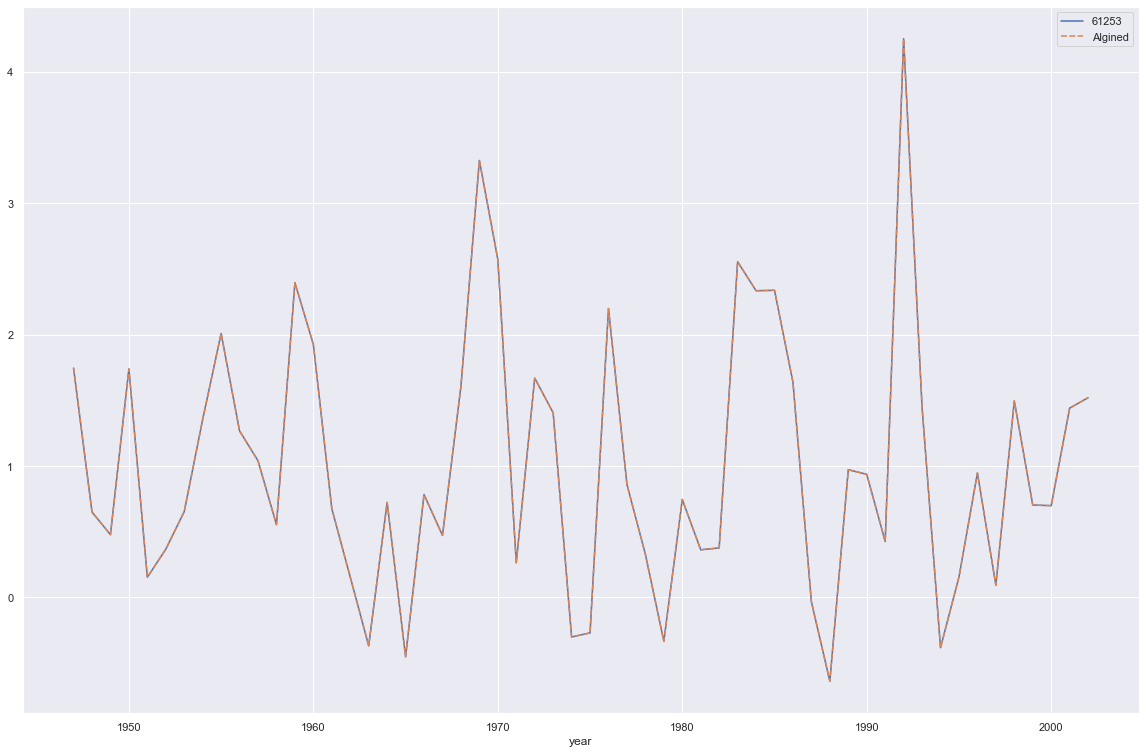

In [376]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["61253",'Algined']])

<AxesSubplot:xlabel='year'>

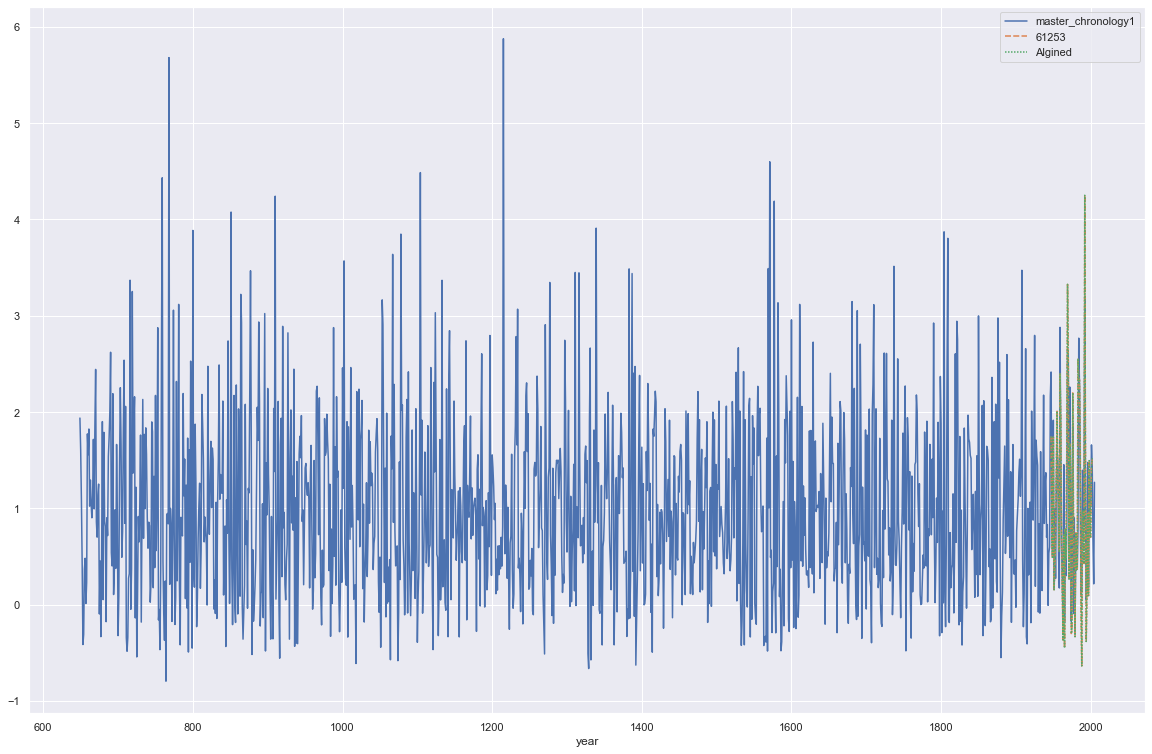

In [378]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["master_chronology1","61253",'Algined']])

# Large Sections Statistical method

In [148]:
large_segments = {}

size = len(samples[1])
step = 1
length = len(samples)
for j in range(length):
    large_segments[j] = ([samples[j][i : i + size] for i in range(0, len(samples[j]), step)])
    j+=1
print(large_segments[0])
print(large_segments[1])

for i in range(len(large_segments)):
    for j in range(len(large_segments[i][j])):
        if len(large_segments[i][j]) != size:
            print(large_segments[i][j])
            large_segments[i][j].delete()
            j+=1
    i+=1

[[1.936838481, 1.605328427, 1.079118093, 0.424857487, -0.415379142, -0.31108195, 0.369677032, 0.48068699, 0.010854986, 0.230856345, 1.772309398, 1.556165602, 1.823282499, 1.0222408, 1.292814337, 1.034969212, 0.901032981, 1.13027091, 1.715414673, 0.993393389, 1.850822571, 2.442041392, 0.857572185, 0.700019051, 1.138055918, 1.250789931, -0.097870558, 0.453070437, -0.333305342, 0.504733741, 1.899954477, 0.051051639, 1.78828375, 0.86615834, 0.809999495, -0.178119801, 0.901369303, 0.716136721, 1.536897697, 1.731422168, 2.000601153, 2.620271926, 0.537737633, 0.400781936, 2.190152718, 0.103830399, 0.355241377, 0.983944721, 0.376496977, 1.662446171, 0.952252259, -0.322735529, 0.089002856, 1.467448995, 2.252157677, 1.659527541], [1.605328427, 1.079118093, 0.424857487, -0.415379142, -0.31108195, 0.369677032, 0.48068699, 0.010854986, 0.230856345, 1.772309398, 1.556165602, 1.823282499, 1.0222408, 1.292814337, 1.034969212, 0.901032981, 1.13027091, 1.715414673, 0.993393389, 1.850822571, 2.442041392,

In [149]:
master_segments1 = large_segments[0]
sample_segments1 = large_segments[1]
large_pairs =  [(x,y) for x in master_segments1 for y in sample_segments1]
print(large_pairs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [150]:
import scipy.stats
large_t_vals = {}
for i in range(len(large_pairs)):
    (seg1, seg2) = large_pairs[i]
    if len(seg1) == len(seg2) == len(samples[1]):
        r = scipy.stats.pearsonr(seg1, seg2)[0]
        n = min(len(seg1), len(seg2))
        t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))
        large_t_vals[t] = (seg1,seg2)
print(large_t_vals)
large_t_vals.keys()

{-0.6490255508342239: ([1.936838481, 1.605328427, 1.079118093, 0.424857487, -0.415379142, -0.31108195, 0.369677032, 0.48068699, 0.010854986, 0.230856345, 1.772309398, 1.556165602, 1.823282499, 1.0222408, 1.292814337, 1.034969212, 0.901032981, 1.13027091, 1.715414673, 0.993393389, 1.850822571, 2.442041392, 0.857572185, 0.700019051, 1.138055918, 1.250789931, -0.097870558, 0.453070437, -0.333305342, 0.504733741, 1.899954477, 0.051051639, 1.78828375, 0.86615834, 0.809999495, -0.178119801, 0.901369303, 0.716136721, 1.536897697, 1.731422168, 2.000601153, 2.620271926, 0.537737633, 0.400781936, 2.190152718, 0.103830399, 0.355241377, 0.983944721, 0.376496977, 1.662446171, 0.952252259, -0.322735529, 0.089002856, 1.467448995, 2.252157677, 1.659527541], [1.745032954, 0.649553419, 0.477090708, 1.738745821, 0.152834958, 0.366398819, 0.652380363, 1.354147458, 2.00835223, 1.266842176, 1.039407007, 0.553637546, 2.394969954, 1.92528626, 0.67562393, 0.154081271, -0.368488809, 0.722670178, -0.452113, 0.78

dict_keys([-0.6490255508342239, 0.24819612915898587, 0.7785370712819953, 0.622135574816416, 1.0948757600162158, -0.7544191549967315, -2.995031832582797, -0.6090926149915091, 0.4763321845865723, -0.26181094489941037, 0.779652440345347, 0.34047376165993376, -0.1188025413512108, -0.19326028925933025, -1.0268125525808576, 0.6351670323382456, 1.44329386646573, -0.03931398390425943, 0.7668928583382655, -0.06801683429477383, -1.1747577624793892, 0.4958176792460811, 1.307243576948939, -1.8496687397087945, 0.16090857770002506, 0.15576827086438078, -2.158901533237812, -0.20544338044814148, 0.3302385635587216, -0.20690473232345752, 0.5090978475913379, -0.048812899595070576, 1.1740132942422803, 0.9488970706761376, 0.5126587385646376, 0.5049028674499693, 1.3488391478519597, -0.3598345476319737, -0.48764084870049224, -1.9233435797799219, -2.9005271091822, 0.4645149222152321, -0.05829416756937481, -1.7620394920802835, 0.9593323050917352, 0.8253059392023916, 0.8435837035743077, 1.5855980124570828, 1.4

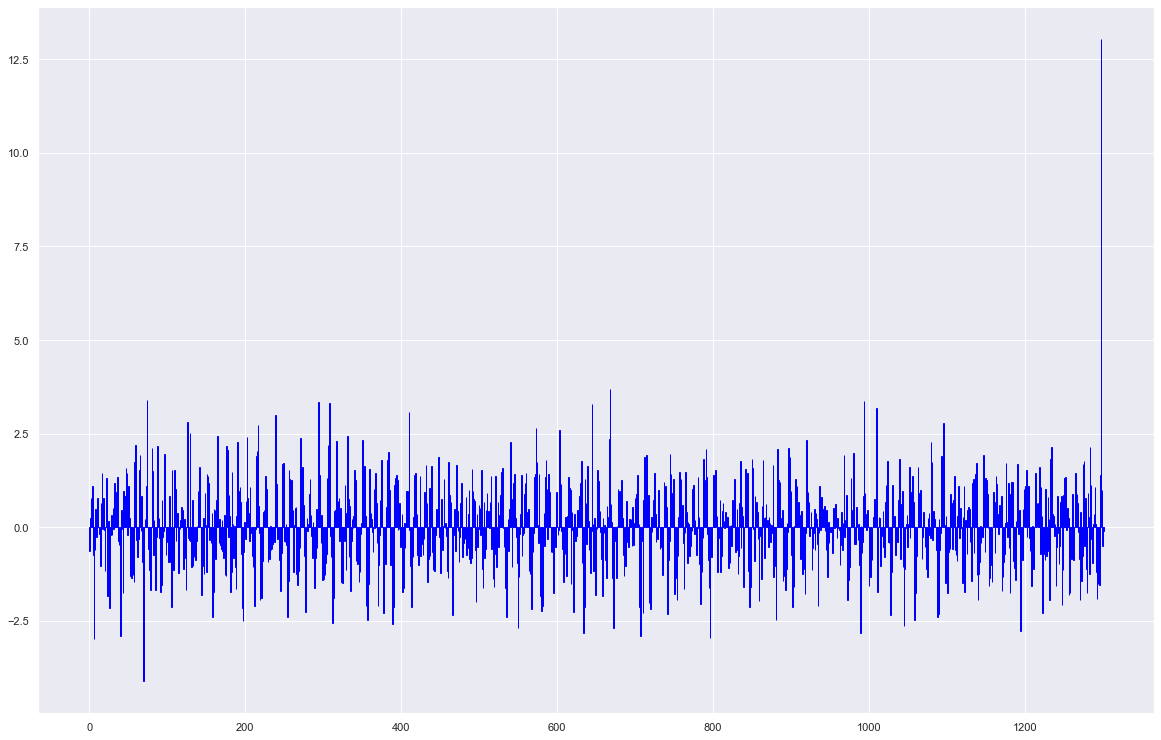

In [151]:
large_values = list(large_t_vals.keys())
sns.set(rc={'figure.figsize':(20,13)})
plt.bar( list(range(len(large_values))), large_values, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.show()

In [152]:
n = len(samples[1])
endlist = [[] for _ in range(n)]
for index, item in enumerate(large_values):
    endlist[index % n].append(item)
print(endlist)

large_std = np.std(large_values)
large_mean = np.mean(large_values)
print(large_mean)
large_out_up = large_mean+3*large_std
print(large_out_up)
large_out_down = large_mean-3*large_std
print(large_out_down)
large_outlying = []
for x in range(len(large_values)):
    if large_values[x] >= large_out_up or large_values[x] <= large_out_down: 
        large_outlying.append(values[x])
print(large_outlying)

#Find the length of the list of pairs for the sample list
#Make sure all the lists of length less than 10 are deleted 
#Collect the t values with a loop using a gap of the list length + 1 and then adding one
#Find the highest 3 lists with the most consistant high t values
#Check these t values are actually statisically signinficant
#Add the padding and place the chronologies into the dataframe



large_max_outlying = (max(large_values, key=abs))
print(large_max_outlying)

[[-0.6490255508342239, -1.2696354868882258, 0.14949497631236455, -0.46944721152377494, 0.47047966482221576, -0.09096943894649243, -0.37094645114645997, 0.7650606228079773, 1.8869275488672703, -1.122565829789329, 1.444658291736579, 1.0434927777626668, -2.6977428572180333, -0.05601784357746635, -2.0465380488411533, -0.6867805989750293, -0.13214639337822084, -0.12360687447203027, 0.0248055730981719, 0.9005406187098453, -1.4837349191238396, 1.703994484545591, -1.9336164236075213, 0.07703610225342353], [0.24819612915898587, -1.4650018134747185, 0.3741863990616269, -0.579330872201632, 0.9531554636008749, 0.09738324978799447, 0.2249919416387599, 1.3258515002369164, -0.2593250678984201, -1.6346232042673652, 0.41768429308969707, 0.987203655659499, -1.9252315857755185, -0.32668054839615535, -0.34812458033968646, 0.5320539358516685, 2.1167696767095237, -0.6940910633280823, 0.8769632444393674, 0.1569692960585645, 0.2608238290862359, 0.1472081977939707, 1.8288225269484617, 0.3500156889978686], [0.7

In [153]:
(master_seg1, sample_seg1) = large_t_vals[large_max_outlying]
print(master_seg1, sample_seg1)
#Would need to check both lists are sequential for the entire segment 
print(samples[0].index(master_seg1[0]))
print(samples[0].index(master_seg1[1]))
print(samples[1].index(sample_seg1[0]))
print(samples[1].index(sample_seg1[1]))


[2.415307112, 0.969133699, 0.501145021, 1.914125507, 0.157856264, 0.994870381, 0.27149899, 1.226489039, 1.597437024, 1.475668069, 0.509919073, 0.17176143, 2.878813758, 1.53605392, 0.58913451, 0.282591306, -0.177122377, 1.452272042, -0.189524253, 0.762222409, 0.299306232, 0.855830851, 2.643632999, 2.528113969, 0.534313446, 2.25967243, 1.26976055, -0.174321338, 0.7574617, 1.88252025, -0.093678678, 0.900529967, -0.303256613, 0.642253076, 0.361474848, 0.372973326, 0.806538715, 2.766661367, 2.254032845, 1.282305812, 0.104664617, 0.166462045, 1.394677935, 1.20175918, 0.810010639, 3.20048871, 1.00000635, 0.051581377, 0.389166981, 1.475974643, 0.185010428, 1.322578743, 0.971332156, 1.034463934, 1.657925393, 1.434834976] [1.745032954, 0.649553419, 0.477090708, 1.738745821, 0.152834958, 0.366398819, 0.652380363, 1.354147458, 2.00835223, 1.266842176, 1.039407007, 0.553637546, 2.394969954, 1.92528626, 0.67562393, 0.154081271, -0.368488809, 0.722670178, -0.452113, 0.782480394, 0.471557792, 1.605351

In [154]:
samples[0].index(master_seg1[0]) - samples[1].index(sample_seg1[0])


1298

In [156]:
#Fix the padding issues (Think i may have cracked it)
#Need a way not to hard code the column names in 
indices = np.where(df["master_chronology1"] == master_seg1[0])

print(indices)

print(samples[1].index(sample_seg1[0]))
start = indices[0]-samples[1].index(sample_seg1[0])
print("start",start)
print("Legth",len(samples[1]))
beginning = df.index[0]
print("Beginning",beginning)
ending = df.index[-1]
print("Ending", ending)
padding = start[0]
padding_end = len(df.index) - (padding + len(samples[1])) 
print("Padding",padding)
print(1283-649)
print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
    
#if len(chronology) > (ending-beginning):
   # print("Length", (ending-beginning))
    #deletion = int(len(chronology)-(ending-beginning))
   # print("Deletion", deletion)
    #for x in range(deletion-1):
      #  chronology.pop()
       # x+=1
print(chronology)

df['Large_Algined']= chronology


(array([1298]),)
0
start [1298]
Legth 56
Beginning 649
Ending 2005
Padding 1298
634
3
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, N

In [162]:
df.head()

master_chronology1  61253  Algined  Large_Algined
year                                                   
649             1.936838    NaN      NaN            NaN
650             1.605328    NaN      NaN            NaN
651             1.079118    NaN      NaN            NaN
652             0.424857    NaN      NaN            NaN
653            -0.415379    NaN      NaN            NaN

<AxesSubplot:xlabel='year'>

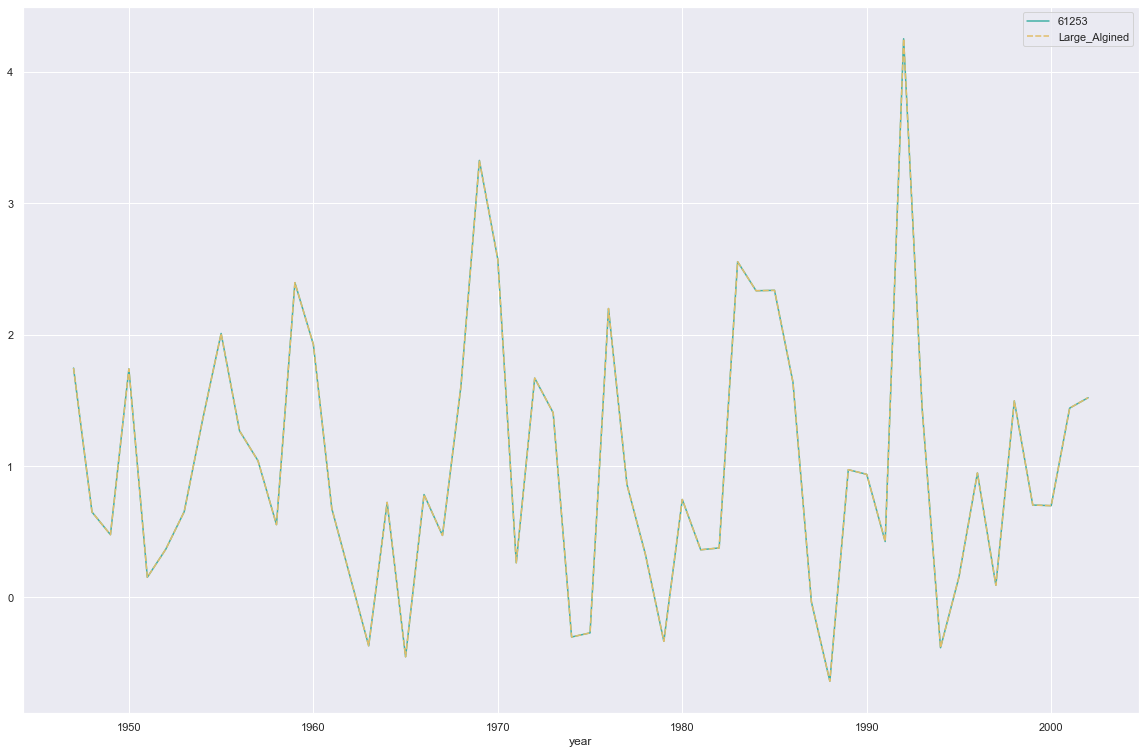

In [163]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["61253",'Large_Algined']], palette=["#40B0A6","#E1BE6A"])

<AxesSubplot:xlabel='year'>

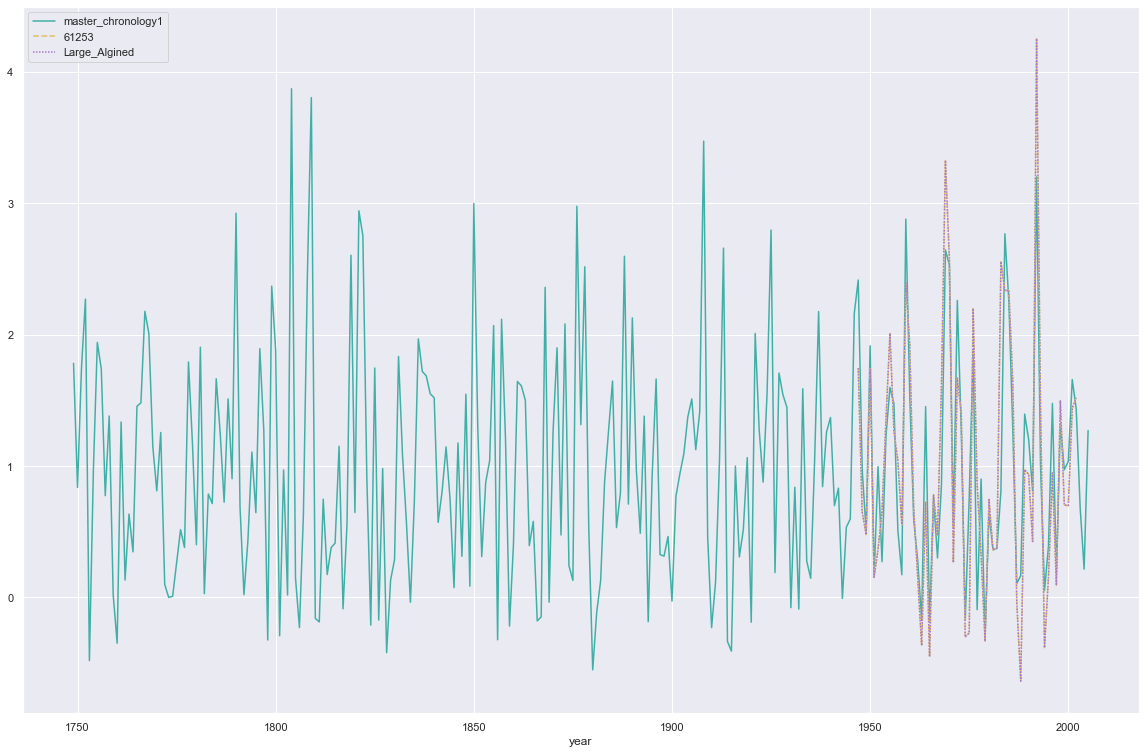

In [169]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["master_chronology1","61253",'Large_Algined']].iloc[1100:],palette=["#40B0A6","#E1BE6A", "#A779C9"])

# Experiments with variables

In [186]:
#Helper method: Splitting an array into even sized chunks with a given overlap. (Using lists of lists and dictionaries.)

segments = {}

size = 10
step = 1
length = len(samples)
for j in range(length):
    segments[j] = ([samples[j][i : i + size] for i in range(0, len(samples[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

short = []

for i in range(len(segments)):
    for j in range(len(segments[i])):
        if len(segments[i][j]) != 10:
            #print(segments[i][j])
            short.append(segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
segments0 = [x for x in segments[0] if x not in short]
segments1 = [x for x in segments[1] if x not in short]
    
#print(segments0)

segments[0] = segments0
segments[1] = segments1
segments[0][-1]
assert len(segments[0][-1]) == 10
assert len(segments[1][-1]) == 10
#print(len(segments[1]))
master_segments = segments[0]
sample_segments = segments[1]
pairs =  [(x,y) for x in master_segments for y in sample_segments]

import scipy.stats
t_vals = {}
for i in range(len(pairs)):
    (seg1, seg2) = pairs[i]
    if len(seg1) == len(seg2) == 10:
        r = np.corrcoef(seg1, seg2)[1,0]
        n = min(len(seg1), len(seg2))
        t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))
        t_vals[str(i) + " " + str(t)] = (seg1,seg2)
    else: 
        print(seg1,seg2)
#print(t_vals)
#print(len(t_vals))
#t_vals.keys()

#print(outlying)

#Find the length of the list of pairs for the sample list
#Make sure all the lists of length less than 10 are deleted 
#Collect the t values with a loop using a gap of the list length + 1 and then adding one
#Find the highest 3 lists with the most consistant high t values
#Check these t values are actually statisically signinficant
#Add the padding and place the chronologies into the dataframe


values = list(t_vals.keys())
for i in range(len(values)):
    values[i] = float(values[i].split()[-1])

#print(max_list)
#print(max_val)
#print(t_values_samples)
#print(len(t_values_samples))
std = np.std(values)
mean = np.mean(values)
#print(mean)
out_up = mean+3*std
#print(out_up)
out_down = mean-3*std
#print(out_down)
outlying = []
for x in range(len(values)):
    if values[x] >= out_up or values[x] <= out_down: 
        outlying.append(values[x])

stri = len(segments[1])+1
x=list(map(str,outlying))
z="-".join(x)
contender = []
stride = len(segments[1]) 

#print(outlying)    
for y in range(len(outlying)):
    ind = values.index(outlying[y])

 
       
            
                
                            
    contender.append(outlying[y])
                              
                               
                           
                        
                    
                            
               
            
       
    

#print(len(outlying))  
#print(len(contender))
#print(contender)
    
max_outlying = (max(values, key=abs))
#print(values.index(max_outlying))
max_outlying = str(str(values.index(max_outlying)) + ' ' + str(max_outlying))
#print(max_outlying)
max_contender = (max(contender, key=abs))
#print(max_contender)
max_contender = str(str(values.index(max_contender)) + ' ' + str(max_contender))
#print(max_contender)
top_contenders = []
all_contenders = []
for i in range(3):
    max_contender = (max(contender, key=abs))
    contender.remove(max_contender)
    max_contender = str(values.index(max_contender)) + ' ' + str(max_contender)
    top_contenders.append(max_contender)
    i+=1
#print(top_contenders)
for i in range(len(contender)):
    all_contenders.append(str(values.index(contender[i])) + ' ' + str(contender[i]))
    
(master_seg, sample_seg) = t_vals[top_contenders[0]]
#print(master_seg, sample_seg)
#Would need to check both lists are sequential for the entire segment 
#print(samples[0].index(master_seg[0]))
#print(samples[0].index(master_seg[1]))
#print(samples[1].index(sample_seg[0]))
#print(samples[1].index(sample_seg[1]))

#print(samples[0].index(master_seg[0]) - samples[1].index(sample_seg[0]))
#print(samples[0].index(master_seg1[0]) - samples[1].index(sample_seg1[0]))
#print(samples[0].index(master_seg2[0]) - samples[1].index(sample_seg2[0]))

start_year = []
for i in range (len(all_contenders)):
    (master_seg, sample_seg) = t_vals[all_contenders[i]]
    start_year.append(samples[0].index(master_seg[0]) - samples[1].index(sample_seg[0]))

from collections import Counter

start_year_dic = Counter(start_year)
start_year_count = len(start_year)
print(start_year_dic)

#Fix the padding issues (Think i may have cracked it)
#Need a way not to hard code the column names in 
indices = np.where(df["master_chronology1"] == master_seg[0])
#print(indices)

#print(samples[1].index(sample_seg[0]))
start = indices[0]-samples[1].index(sample_seg[0])
#print("start",start)
#print("Legth",len(samples[1]))
beginning = df.index[0]
#print("Beginning",beginning)
ending = df.index[-1]
#print("Ending", ending)
padding = start[0]
padding_end = len(df.index) - (padding + len(samples[1])) 
#print("Padding",padding)
#print(1283-649)
#print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    #print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
#print(chronology)

df['Algined']= chronology


Counter({1285: 30, 74: 10, 1116: 8, 154: 7, 145: 7, 382: 7, 569: 7, 595: 7, 177: 6, 157: 6, 541: 6, 659: 6, 790: 6, 908: 6, 1068: 6, 1046: 6, 1175: 6, 203: 5, 266: 5, 401: 5, 442: 5, 408: 5, 610: 5, 1160: 5, 1170: 5, -2: 4, 61: 4, 63: 4, 134: 4, 241: 4, 346: 4, 642: 4, 665: 4, 981: 4, 986: 4, 1081: 4, 1083: 4, 1176: 4, 1303: 4, 1318: 4, -24: 3, 44: 3, 59: 3, 94: 3, 168: 3, 170: 3, 229: 3, 213: 3, 341: 3, 350: 3, 404: 3, 444: 3, 417: 3, 486: 3, 544: 3, 519: 3, 576: 3, 598: 3, 632: 3, 702: 3, 693: 3, 709: 3, 729: 3, 745: 3, 810: 3, 879: 3, 864: 3, 894: 3, 943: 3, 968: 3, 996: 3, 1011: 3, 1002: 3, 1008: 3, 1025: 3, 1007: 3, 1067: 3, 1143: 3, 1130: 3, 1132: 3, 1182: 3, 1193: 3, 1234: 3, 1247: 3, 1244: 3, 1288: 3, 4: 2, 23: 2, 10: 2, 57: 2, 85: 2, 129: 2, 96: 2, 167: 2, 209: 2, 218: 2, 204: 2, 192: 2, 181: 2, 201: 2, 275: 2, 289: 2, 301: 2, 276: 2, 282: 2, 327: 2, 293: 2, 342: 2, 395: 2, 423: 2, 430: 2, 419: 2, 450: 2, 426: 2, 483: 2, 477: 2, 532: 2, 536: 2, 560: 2, 585: 2, 575: 2, 609: 2, 

Experimental data:

Changing the stride length for the contender list.

In [184]:
eight_stride_count = start_year_count
eight_stride_counter = start_year_dic

In [30]:
seven_stride_count = start_year_count
seven_stride_counter = start_year_dic

In [32]:
six_stride_count = start_year_count
six_stride_counter = start_year_dic

In [34]:
five_stride_count = start_year_count
five_stride_counter = start_year_dic

In [36]:
four_stride_count = start_year_count
four_stride_counter = start_year_dic 

In [38]:
three_stride_count = start_year_count
three_stride_counter = start_year_dic

In [40]:
two_stride_count = start_year_count
two_stride_counter = start_year_dic

In [42]:
one_stride_count = start_year_count
one_stride_counter = start_year_dic

In [185]:
zero_stride_count = start_year_count
zero_stride_counter = start_year_dic

Changing standard diviations for outliers for t values

In [135]:
three_standard_diviations = start_year_dic

In [141]:
four_standard_diviations = start_year_dic
print(four_standard_diviations)

Counter({1298: 6})


In [47]:
print(five_stride_counter)

Counter({1298: 24, 521: 2, 567: 2, 593: 2, 1059: 2, 74: 1, 201: 1, 359: 1, 608: 1, 694: 1})


<function matplotlib.pyplot.show(close=None, block=None)>

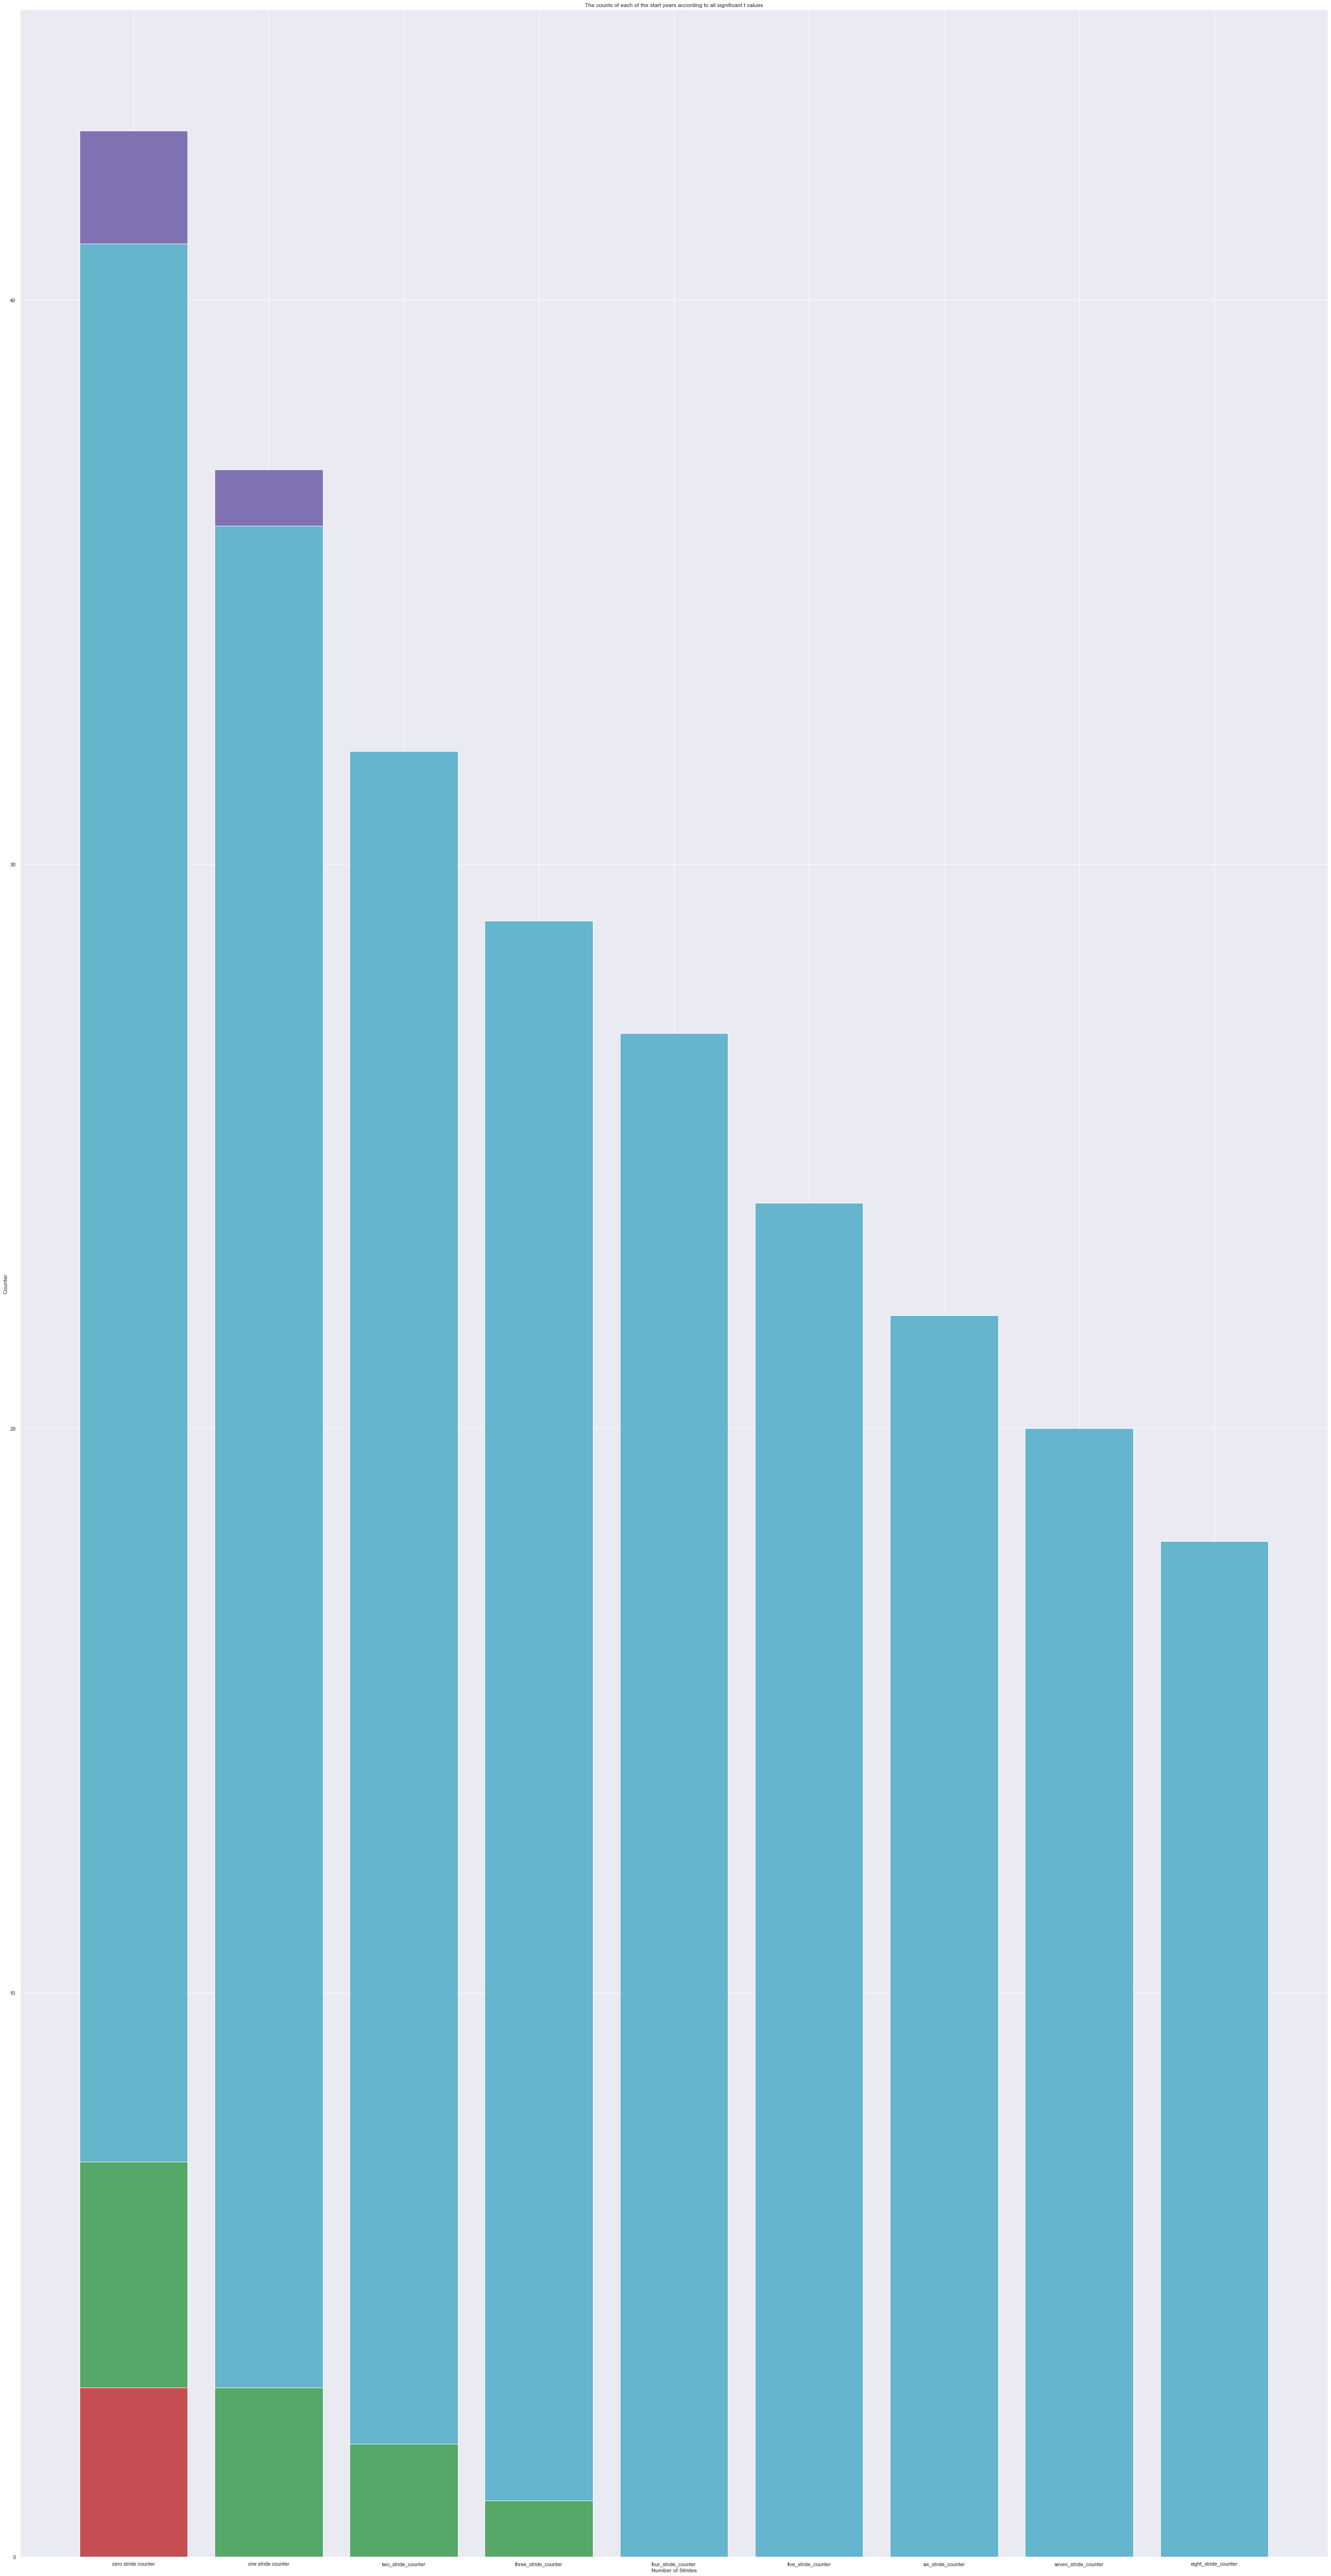

In [101]:
# create data
x = ['zero stride counter', 'one stride counter', 'two_stride_counter', 'three_stride_counter', 'four_stride_counter', 'five_stride_counter', 'six_stride_counter', 'seven_stride_counter', 'eight_stride_counter'  ]
y1 = np.array(zero_stride_counter.values())
y2 = np.array(one_stride_counter.values())
y3 = np.array(two_stride_counter.values())
y4 = np.array(three_stride_counter.values())
y5 = np.array(four_stride_counter.values())
 
    
#Need to get lists of each count 
legend_list = []
counter_list = []
for i in range(len(list(zero_stride_counter.values()))):
    legend_list.append(list(zero_stride_counter.keys())[i])
    
#for i in range(len(legend_list)):
    
# plot bars in stack manner
for i in range(len(legend_list)):
    counter_list.append([zero_stride_counter[legend_list[i]], one_stride_counter[legend_list[i]], two_stride_counter[legend_list[i]], three_stride_counter[legend_list[i]], four_stride_counter[legend_list[i]], five_stride_counter[legend_list[i]], six_stride_counter[legend_list[i]], seven_stride_counter[legend_list[i]], eight_stride_counter[legend_list[i]]])
    i+=1

correct = [zero_stride_counter[1298], one_stride_counter[1298], two_stride_counter[1298], three_stride_counter[1298], four_stride_counter[1298], five_stride_counter[1298], six_stride_counter[1298], seven_stride_counter[1298], eight_stride_counter[1298]]
total = [zero_stride_count, one_stride_count, two_stride_count, three_stride_count, four_stride_count, five_stride_count, six_stride_count, seven_stride_count, eight_stride_count]
incorrect = [element1 - element2 for (element1, element2) in zip(total, correct)]

plt.bar(x, counter_list[0], color='r')
plt.bar(x, counter_list[1], bottom= counter_list[0], color='b')

color_list = ['r', 'g', 'b', 'y', 'c', 'm']
beginning = counter_list[1]
for i in range(len(counter_list)-2):
    bottom_list = [x + y for x, y in zip(beginning, counter_list[i+1])]
    plt.bar(x, counter_list[i+2], bottom = bottom_list, color = color_list[i%6]) 
sns.set(rc={'figure.figsize':(50,100)})
plt.xlabel("Number of Strides")
plt.ylabel("Counter")



plt.title("The counts of each of the start years according to all significant t values")

plt.show


In [78]:
correct = [zero_stride_counter[1298], one_stride_counter[1298], two_stride_counter[1298], three_stride_counter[1298], four_stride_counter[1298], five_stride_counter[1298], six_stride_counter[1298], seven_stride_counter[1298], eight_stride_counter[1298]]
total = [zero_stride_count, one_stride_count, two_stride_count, three_stride_count, four_stride_count, five_stride_count, six_stride_count, seven_stride_count, eight_stride_count]
incorrect = [element1 - element2 for (element1, element2) in zip(total, correct)]

print(correct)
print(incorrect)
print(total)

[39, 36, 32, 29, 27, 24, 22, 20, 18]
[478, 210, 104, 55, 29, 13, 4, 0, 0]
[517, 246, 136, 84, 56, 37, 26, 20, 18]


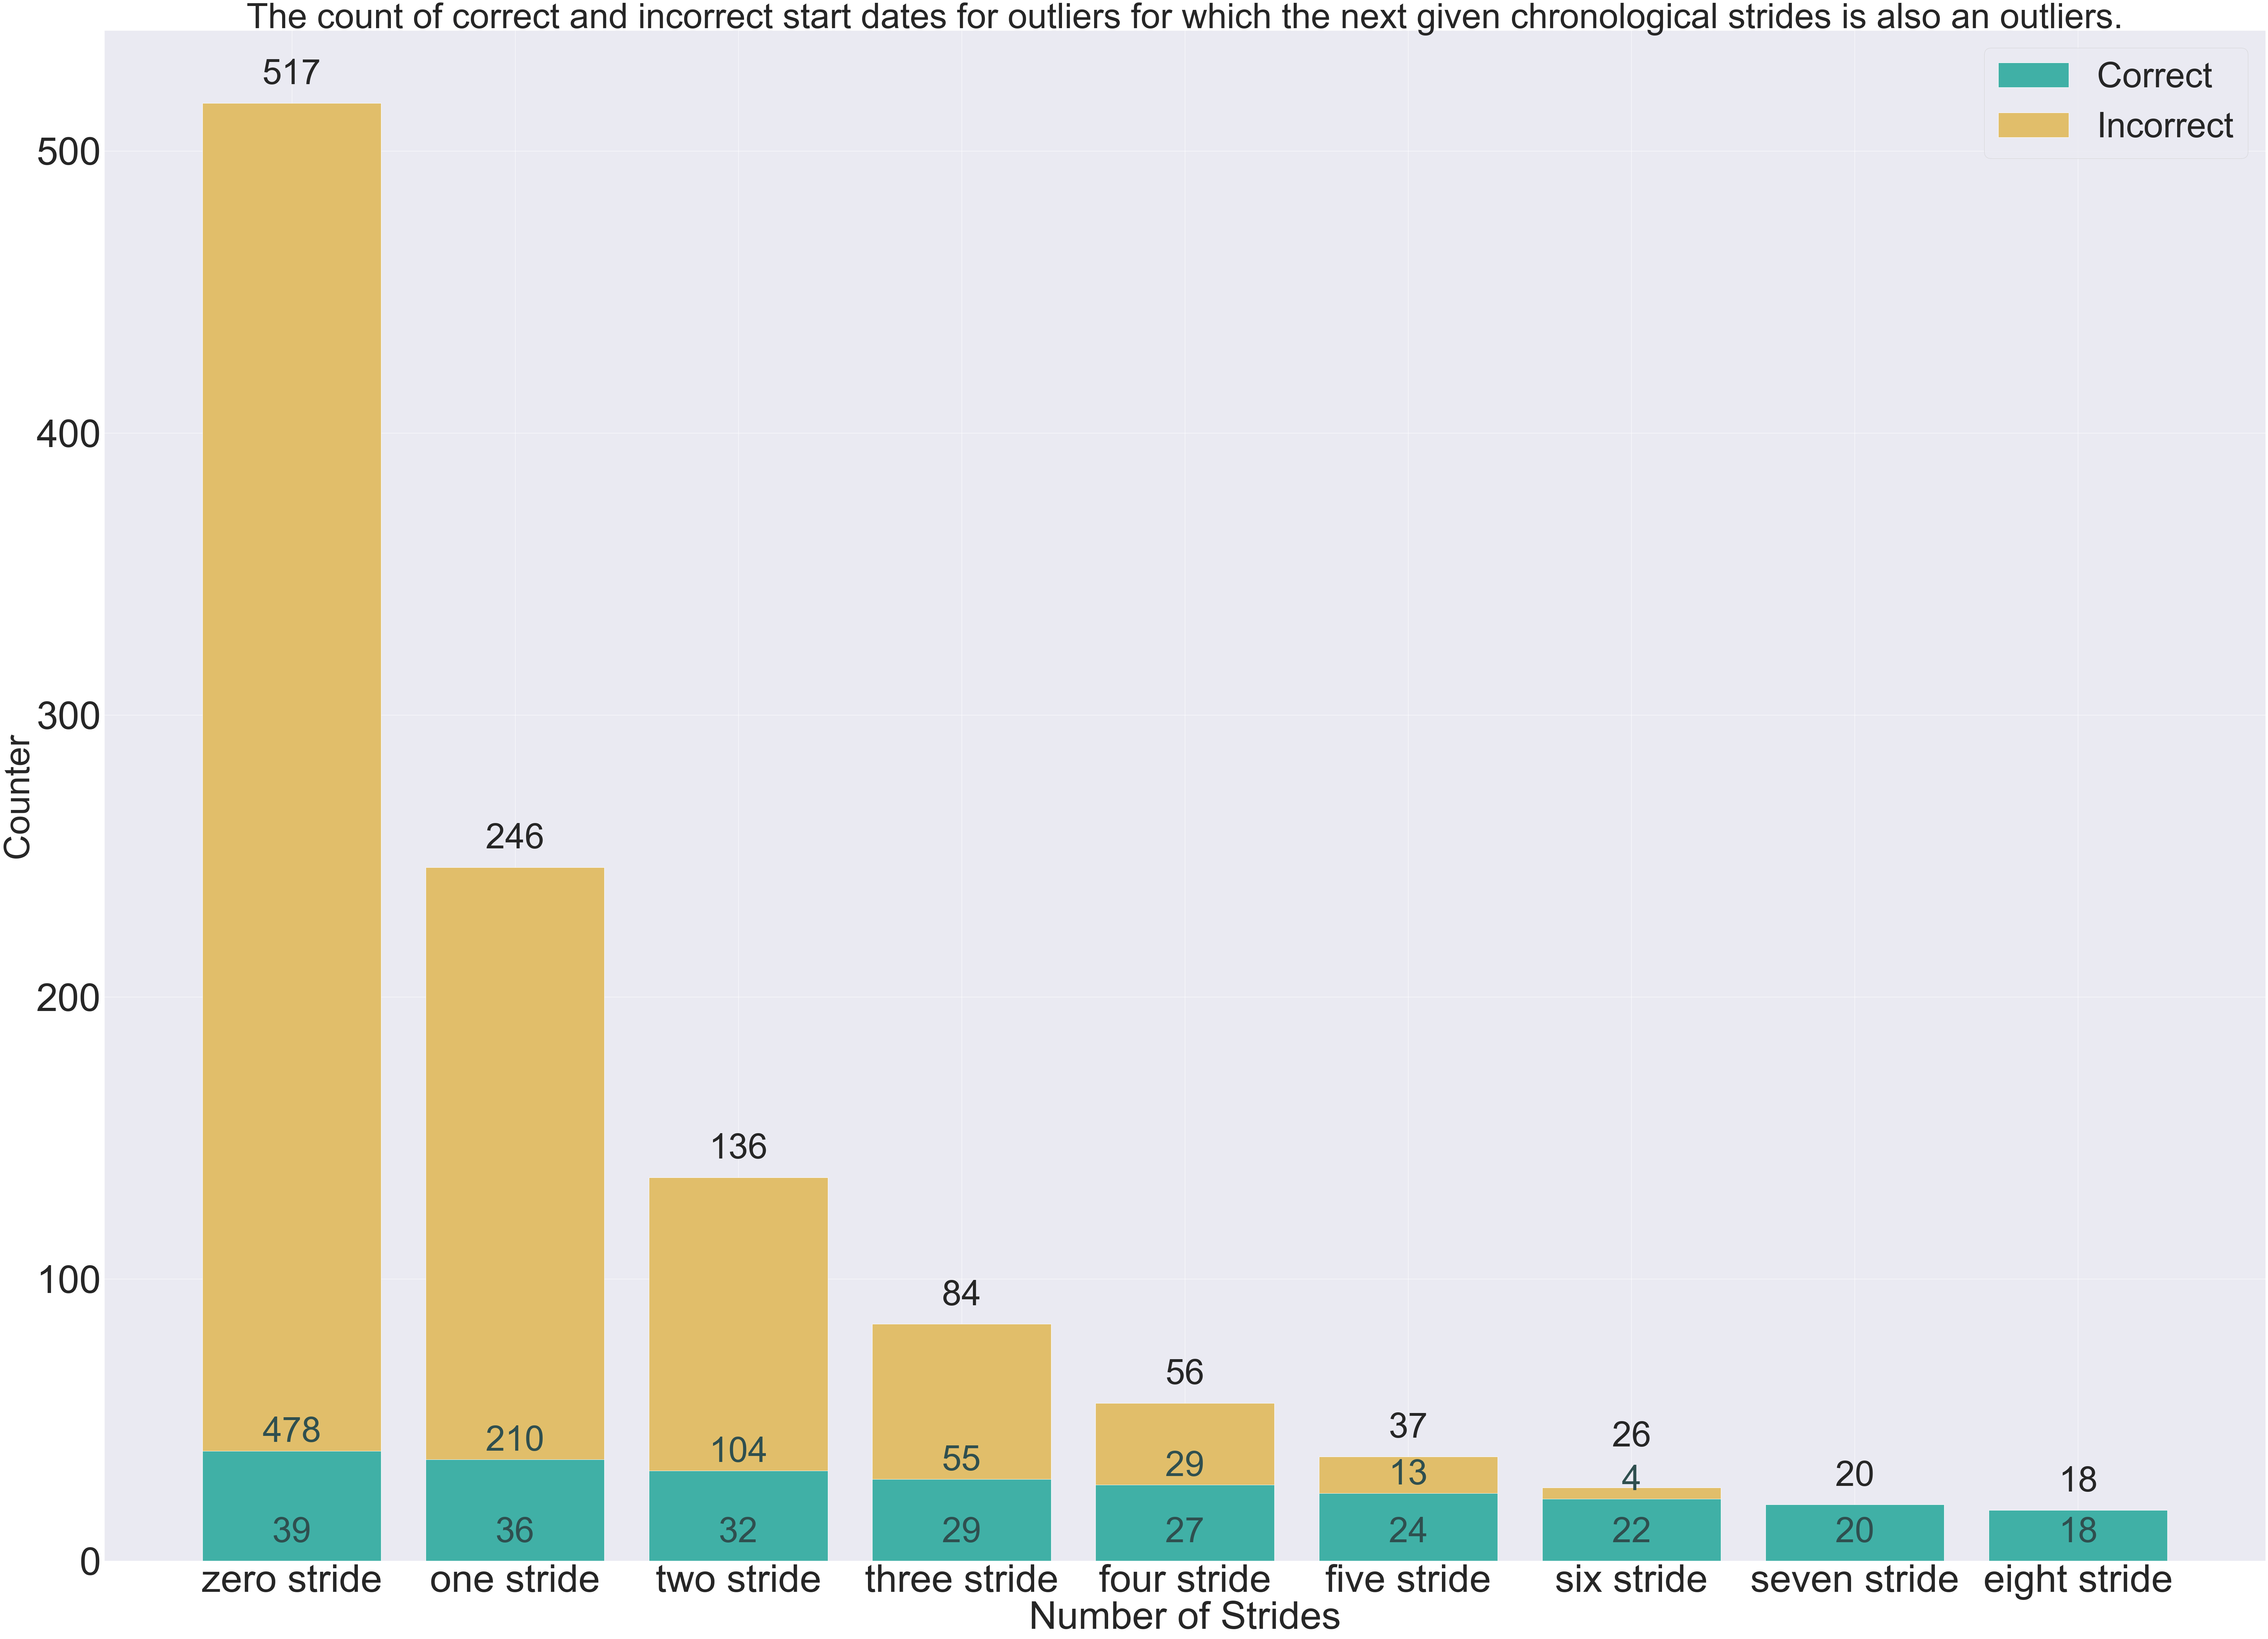

In [175]:
fig, ax = plt.subplots()
x = ['zero stride', 'one stride', 'two stride', 'three stride', 'four stride', 'five stride', 'six stride', 'seven stride', 'eight stride'  ]
plt.bar(x, correct, color='#40B0A6')
plt.bar(x, incorrect, bottom= correct, color='#E1BE6A')

plt.xlabel("Number of Strides", fontsize=110)
plt.ylabel("Counter",fontsize=100)

sns.set(rc={'figure.figsize':(110,80)})
plt.legend(["Correct", "Incorrect"],fontsize=100)
plt.title("The count of correct and incorrect start dates for outliers for which the next given chronological strides is also an outliers.",fontsize=100)
plt.xticks(fontsize=110)
plt.yticks(fontsize=110)
rects = ax.patches
for rect, c in zip(rects, correct):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, 10, c, ha="center", va="center", fontsize=100, color= "darkslategrey")

for rect, i in zip(rects, incorrect):
    height = rect.get_height()
    if i != 0:
        ax.text(
            rect.get_x() + rect.get_width() / 2, height+6.5, i, ha="center", va="center", fontsize=100, color = "darkslategrey")
        
for rect, i in zip(rects, total):
    height = rect.get_height()
    if i == 26:
        ax.text(
        rect.get_x() + rect.get_width() / 2, i+18, i, ha="center", va="center", fontsize=100)
    else:
  
        ax.text(
            rect.get_x() + rect.get_width() / 2, i+10, i, ha="center", va="center", fontsize=100)



plt.show
plt.savefig('training_6_stride_bar_graph.png')